In [24]:

import random
import datetime
# from k_merge_heap import *
import heapq
import matplotlib.pyplot as plt

In [25]:
def k_merge(lista_arreglos):
    if len(lista_arreglos) == 1:
        return lista_arreglos[0]

    medio = len(lista_arreglos) // 2  #-> B =2
    izq = lista_arreglos[:medio]  # O(medio) -> a lo sumo es O((K*h)/2) -> O(K*h)
    der = lista_arreglos[medio:]  # O(fin - medio+1) ->  a lo sumo es O((K*h)/2) -> O(K*h)

    ## dos llamados recursivos -> A = 2
    izq = k_merge(izq) 
    der = k_merge(der)
    return merge(izq,der) # O(K*h)) -> n^C

In [26]:
def merge(left, right):
    res = []
    while left and right: 
        if left[0] <= right[0]:
            res.append(left.pop(0)) 
        else:                     
            res.append(right.pop(0))
    res = res + left + right
                           
    return res

In [27]:
def generarArregloConHElementos(h):
    arr = []
    for i in range(h):
        arr.append(random.randint(1, 300))
    arr.sort()
    return arr

In [28]:
class Pruebas:
    def probarKArreglosConHElementos(self, k, func,h = 100):

        array = [generarArregloConHElementos(h) for i in range(k)]
        start_time = datetime.datetime.now()
        func(array)
        end = datetime.datetime.now()
        elapsedTime = end - start_time;
        return elapsedTime.total_seconds()


In [29]:

def k_merge_catedra(lista_elementos):
    heap = []
    res = []
    for i in range(len(lista_elementos)):
        heapq.heappush(heap,(lista_elementos[i][0],i,0))

    while heap: 
        minimo,indice_arreglo,indice_numero = heapq.heappop(heap) 
        res.append(minimo)
        if (indice_numero < len(lista_elementos[indice_arreglo])-1):
            nueva_posicion = indice_numero + 1
            heapq.heappush(heap,(lista_elementos[indice_arreglo][nueva_posicion],indice_arreglo,nueva_posicion))
    return res

In [33]:
def probarFunc(func):
  pruebas = Pruebas()
  ks = [100, 500, 800, 1500,3000,4500,6000] 
  times = [] 

  for k in ks:
      time = pruebas.probarKArreglosConHElementos(k, func)
      times.append(time)
  return ks,times


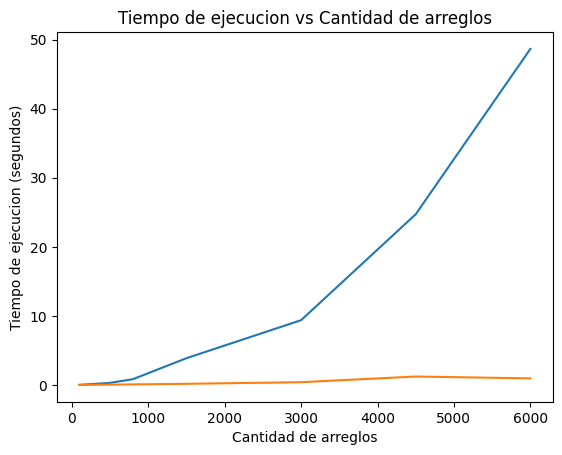

In [34]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos')
ks1, times1 = probarFunc(k_merge)
ks2, times2 = probarFunc(k_merge_catedra)
plt.plot(ks1, times1)
plt.plot(ks2, times2)
plt.show() 





